In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("/content/drive/MyDrive/Datasets/Titanic_Dataset/train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("/content/drive/MyDrive/Datasets/Titanic_Dataset/test.csv")

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


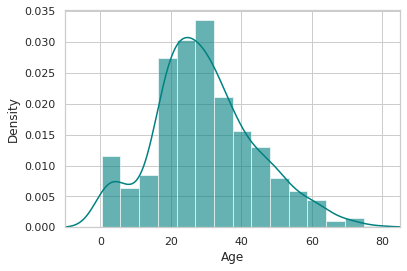

In [ ]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [ ]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [ ]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


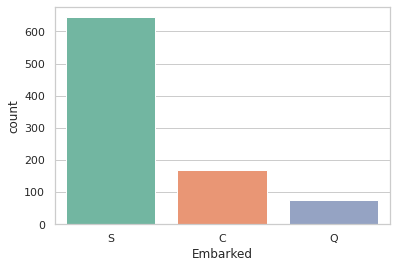

In [ ]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [ ]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [ ]:
# If "Age" is missing for a given row impute with 28 (median age).
# If "Embarked" is missing for a riven row impute with "S" (the most common boarding port).
# ignore "Cabin" as a variable

In [ ]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


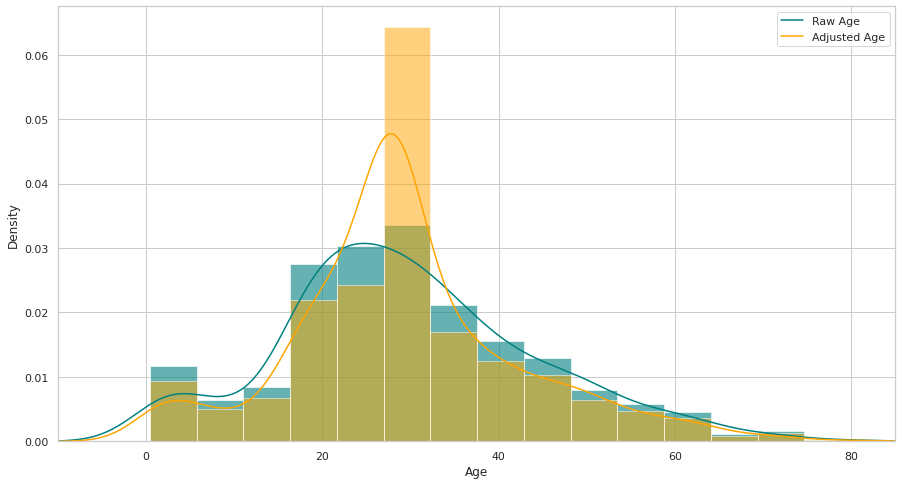

In [ ]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
# According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake 
# (and to account for possible multicollinearity) combine the effect of these variables into one categorical predictor: whether 
# or not that individual was traveling alone.

In [ ]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [ ]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


Test Class

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


EDA

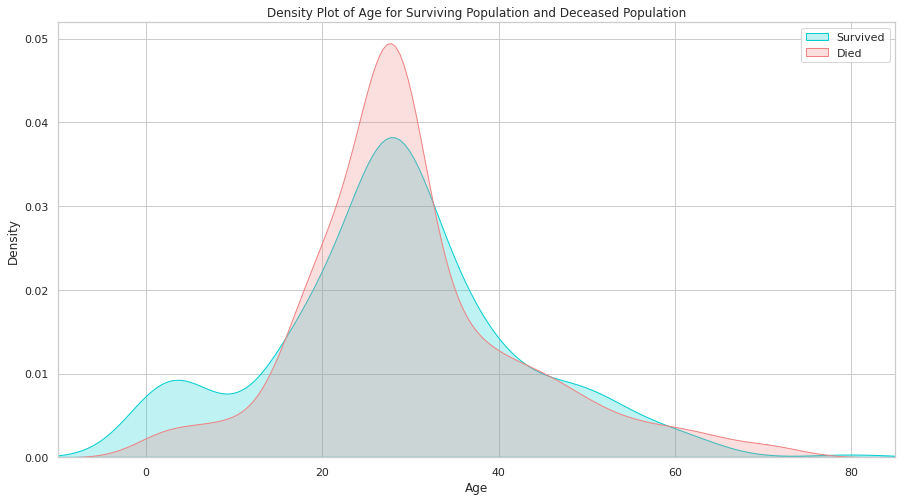

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

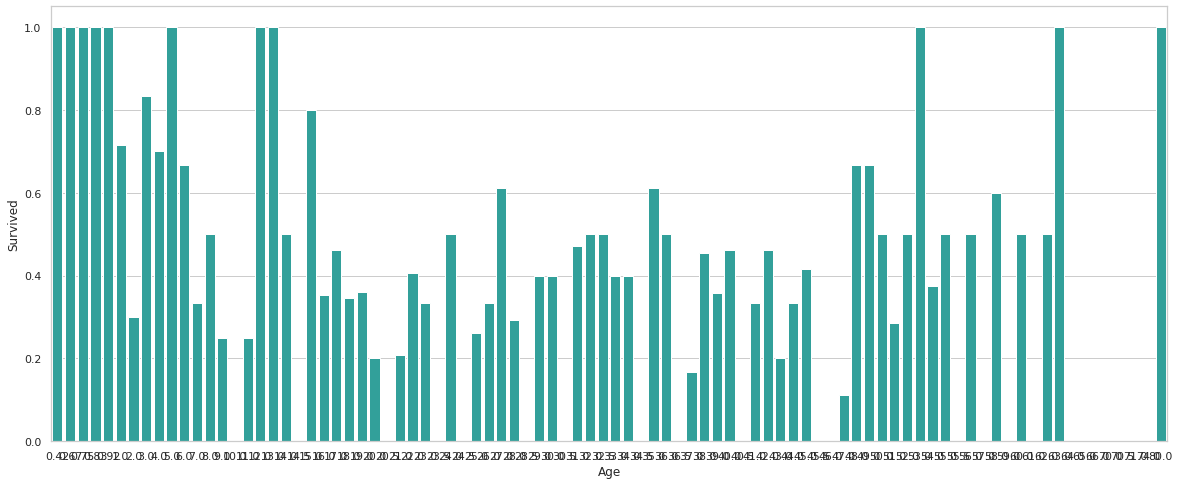

In [ ]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [ ]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

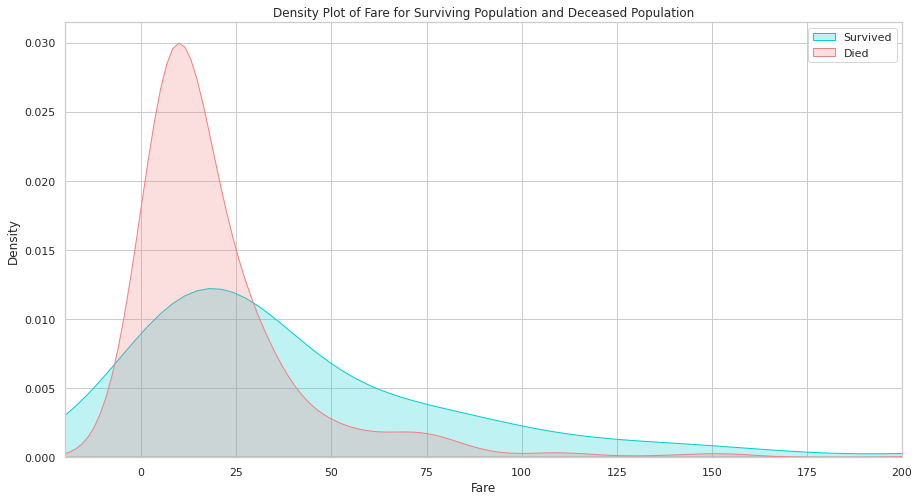

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

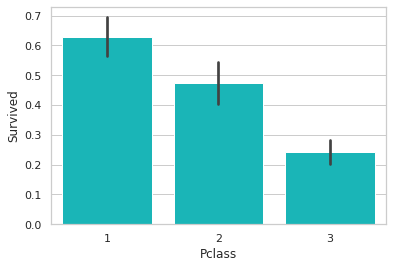

In [ ]:
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

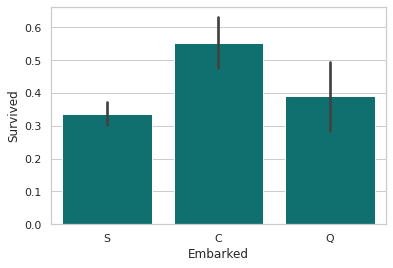

In [ ]:
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()

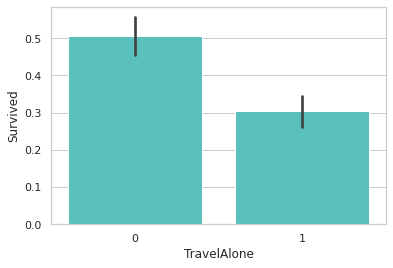

In [ ]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

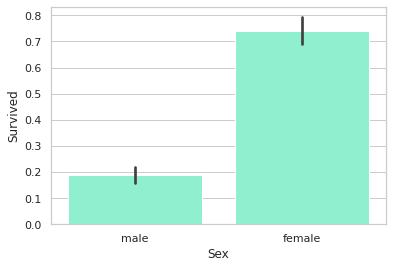

In [ ]:
sns.barplot('Sex', 'Survived', data=train_df, color="aquamarine")
plt.show()

In [ ]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']

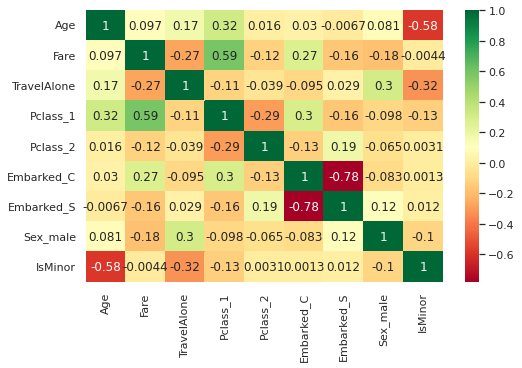

In [ ]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
def sigmoid(X):
    return 1.0/(1.0 + np.exp(-X))

In [ ]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [ ]:
def cost_function(X, Y, theta):
    h_theta = hypothesis(X, theta)
    cost = np.mean(Y*np.log(h_theta) + (1 - Y)*np.log(1 - h_theta))
    cost = cost*-1

    return cost

In [ ]:
def gradient(X, Y, theta):

  h_theta = hypothesis(X, theta)

  grad = np.dot(X.T, (Y - h_theta))

  return grad/X.shape[0]

In [ ]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):

  m, n = X.shape
  theta = np.zeros((n, 1))
  cost_epoch = []

  for i in range(max_steps):

    grad = gradient(X, Y, theta)

    e = cost_function(X, Y, theta)
    cost_epoch.append(e)

    theta = theta + learning_rate*grad

  return (theta, cost_epoch)

In [ ]:
X_train, X_test, y_train, y_test

(      Age      Fare  TravelAlone  Pclass_1  Pclass_2  Embarked_C  Embarked_S  \
 30   40.0   27.7208            1         1         0           1           0   
 10    4.0   16.7000            0         0         0           0           1   
 873  47.0    9.0000            1         0         0           0           1   
 182   9.0   31.3875            0         0         0           0           1   
 876  20.0    9.8458            1         0         0           0           1   
 ..    ...       ...          ...       ...       ...         ...         ...   
 534  30.0    8.6625            1         0         0           0           1   
 584  28.0    8.7125            1         0         0           1           0   
 493  71.0   49.5042            1         1         0           1           0   
 527  28.0  221.7792            1         1         0           0           1   
 168  28.0   25.9250            1         1         0           0           1   
 
      Sex_male  IsMinor  


In [ ]:
y_train = np.array(y_train)
print(y_train.shape)

(712,)


In [ ]:
ones = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones, X_train))
print(X_train[:4, :4], X_train.shape)
y_train = y_train.reshape((-1, 1))

[[ 1.     40.     27.7208  1.    ]
 [ 1.      4.     16.7     0.    ]
 [ 1.     47.      9.      1.    ]
 [ 1.      9.     31.3875  0.    ]] (712, 10)


In [ ]:
theta, cost_epoch = gradient_descent(X_train, y_train, learning_rate=0.001, max_steps = 1000000)

In [ ]:
theta

array([[ 1.16021957e+00],
       [-2.84339014e-02],
       [ 8.09940120e-04],
       [ 8.32330234e-02],
       [ 2.32187466e+00],
       [ 1.43560957e+00],
       [-4.41659487e-02],
       [-5.27739129e-01],
       [-2.68543509e+00],
       [ 6.25407333e-01]])

In [ ]:
cost_epoch[-10:]

[0.43312148059030836,
 0.4331214805664334,
 0.4331214805425588,
 0.43312148051868404,
 0.43312148049480975,
 0.4331214804709354,
 0.43312148044706134,
 0.43312148042318743,
 0.43312148039931364,
 0.43312148037544007]

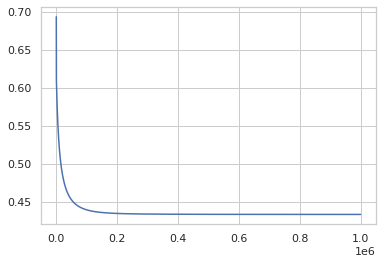

In [ ]:
plt.plot(cost_epoch)

In [ ]:
ones = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones, X_test))
print(X_test[:4, :4], X_test.shape)
y_test = np.array(y_test)
y_test = y_test.reshape((-1, 1))

[[ 1.     42.     26.2875  1.    ]
 [ 1.     21.      8.05    1.    ]
 [ 1.     24.     65.      0.    ]
 [ 1.     28.     56.4958  1.    ]] (179, 10)


In [ ]:
def predict(X, theta):
    h_theta = hypothesis(X, theta)
    output = np.zeros(h_theta.shape)

    output[h_theta>0.5] = 1
    output = output.astype('int')

    return output

In [ ]:
train_preds = predict(X_train, theta)
test_preds = predict(X_test, theta)

In [ ]:
for i in range(len(test_preds)):
    print(test_preds[i], y_test[i])

[0] [1]
[0] [0]
[1] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [1]
[0] [0]
[0] [1]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [1]
[0] [1]
[1] [1]
[0] [1]
[0] [0]
[1] [0]
[0] [0]
[1] [0]
[1] [1]
[0] [0]
[1] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [0]
[0] [0]
[0] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[1] [0]
[1] [1]
[0] [0]
[0] [1]
[1] [1]
[0] [0]
[0] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [1]
[1] [0]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[0] [1]
[0] [0]
[0] [0]
[1] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [1]
[1] [1]
[0] [1]
[0] [1]
[1] [1]
[0] [1]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [1]
[0] [0]
[0] [1]
[1] [1]
[1] [0]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [1]
[0] [0]
[0] [0]
[0] [1]
[0] [0]
[0] [1]
[0] [0]
[1] [1]
[1] [1]
[0] [1]
[1] [1]
[0] [1]
[0] [0]
[1] [1]
[0] [0]
[0] [0]
[0] [0]
[0] [0]


In [ ]:
def accuracy(preds, labels):
    labels = labels.astype('int')
    print(np.sum(preds == labels)/labels.shape[0])

In [ ]:
accuracy(test_preds, y_test)

0.7821229050279329


In [ ]:
accuracy(train_preds, y_train)

0.8132022471910112


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test, y_test)

0.776536312849162

In [3]:
np.where?